In [1]:
import numpy as np
import pandas as pd

In [2]:
dates = pd.date_range("20200101", periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2020-01-01,1.366447,0.910697,2.362575,-0.298023
2020-01-02,-1.457752,-1.570098,0.802584,0.417324
2020-01-03,0.113429,-1.500051,-0.389919,-2.332029
2020-01-04,0.411142,-0.119177,-0.248844,-0.100385
2020-01-05,0.656853,0.868072,-0.362440,0.192098
2020-01-06,-1.100813,0.443117,0.174457,-0.646547


Transposing your data:

In [4]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,1.366447,-1.457752,0.113429,0.411142,0.656853,-1.100813
B,0.910697,-1.570098,-1.500051,-0.119177,0.868072,0.443117
C,2.362575,0.802584,-0.389919,-0.248844,-0.362440,0.174457
D,-0.298023,0.417324,-2.332029,-0.100385,0.192098,-0.646547


sort by an axias

In [5]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,-0.298023,2.362575,0.910697,1.366447
2020-01-02,0.417324,0.802584,-1.570098,-1.457752
2020-01-03,-2.332029,-0.389919,-1.500051,0.113429
2020-01-04,-0.100385,-0.248844,-0.119177,0.411142
2020-01-05,0.192098,-0.362440,0.868072,0.656853
2020-01-06,-0.646547,0.174457,0.443117,-1.100813


***Getting***

Selecting a single column, which yields a Series, equivalent to df.A:

In [6]:
df["A"]

2020-01-01    1.366447
2020-01-02   -1.457752
2020-01-03    0.113429
2020-01-04    0.411142
2020-01-05    0.656853
2020-01-06   -1.100813
Freq: D, Name: A, dtype: float64

Selection by label

In [8]:
df

,A,B,C,D
2020-01-01,1.366447,0.910697,2.362575,-0.298023
2020-01-02,-1.457752,-1.570098,0.802584,0.417324
2020-01-03,0.113429,-1.500051,-0.389919,-2.332029
2020-01-04,0.411142,-0.119177,-0.248844,-0.100385
2020-01-05,0.656853,0.868072,-0.362440,0.192098
2020-01-06,-1.100813,0.443117,0.174457,-0.646547


In [7]:
df.loc[dates[0]]

A    1.366447
B    0.910697
C    2.362575
D   -0.298023
Name: 2020-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [9]:
df.loc[:, ["A", "B"]]

,A,B
2020-01-01,1.366447,0.910697
2020-01-02,-1.457752,-1.570098
2020-01-03,0.113429,-1.500051
2020-01-04,0.411142,-0.119177
2020-01-05,0.656853,0.868072
2020-01-06,-1.100813,0.443117


Showing label slicing, both endpoints are included:

In [10]:
df.loc["20200102":"20200104", ["A", "B"]]

,A,B
2020-01-02,-1.457752,-1.570098
2020-01-03,0.113429,-1.500051
2020-01-04,0.411142,-0.119177


Reduction in the dimensions of the returned object:

In [12]:
df.loc["20200102", ["A", "B"]]

A   -1.457752
B   -1.570098
Name: 2020-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [13]:
df.loc[dates[0], "A"]

1.366446515869066

***Missing data***

In [14]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2020-01-01,1.366447,0.910697,2.362575,-0.298023,1.0
2020-01-02,-1.457752,-1.570098,0.802584,0.417324,1.0
2020-01-03,0.113429,-1.500051,-0.389919,-2.332029,NaN
2020-01-04,0.411142,-0.119177,-0.248844,-0.100385,NaN


To drop any rows that have missing data.

In [16]:
df1.dropna(how="any")

,A,B,C,D,E
2020-01-01,1.366447,0.910697,2.362575,-0.298023,1.0
2020-01-02,-1.457752,-1.570098,0.802584,0.417324,1.0


Filling missing data.

In [17]:
df1.fillna(value=0)

,A,B,C,D,E
2020-01-01,1.366447,0.910697,2.362575,-0.298023,1.0
2020-01-02,-1.457752,-1.570098,0.802584,0.417324,1.0
2020-01-03,0.113429,-1.500051,-0.389919,-2.332029,0.0
2020-01-04,0.411142,-0.119177,-0.248844,-0.100385,0.0


***Grouping***

By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [19]:
df = pd.DataFrame(
      {
           "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
           "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
           "C": np.random.randn(8),
           "D": np.random.randn(8),
       }
    )
df

,A,B,C,D
0,foo,one,1.258471,0.965610
1,bar,one,-0.019449,-0.463351
2,foo,two,1.630028,1.712640
3,bar,three,-0.324189,-1.072265
4,foo,two,0.941561,0.271607
5,bar,two,0.925556,-0.477204
6,foo,one,0.379241,-0.210109
7,foo,three,1.810138,-0.696614


Grouping and then applying the sum() function to the resulting groups.

In [21]:
df.groupby("A").sum()

,C,D
A,,
bar,0.581917,-2.012820
foo,6.019438,2.043135


Plotting


We use the standard convention for referencing the matplotlib API:

In [22]:
import matplotlib.pyplot as plt

plt.close("all")

<AxesSubplot:>

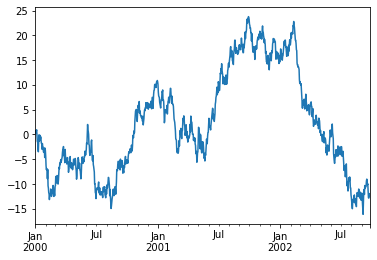

In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [25]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"] )
df

,A,B,C,D
2000-01-01,2.404970,1.082399,-0.727170,-1.729646
2000-01-02,0.087690,1.326194,2.135990,-0.889552
2000-01-03,-0.265860,-0.835623,1.922854,1.561449
2000-01-04,-0.254679,1.270865,-0.674049,0.783140
2000-01-05,0.836985,0.444451,0.081664,-0.631676
...,...,...,...,...
2002-09-22,-0.391422,-0.643675,0.483069,-0.816371
2002-09-23,-0.861783,-0.545203,1.437164,0.140298
2002-09-24,-0.972918,1.125375,-0.217718,0.695453
2002-09-25,0.666962,-0.676674,1.002440,-0.662369


<Figure size 432x288 with 0 Axes>

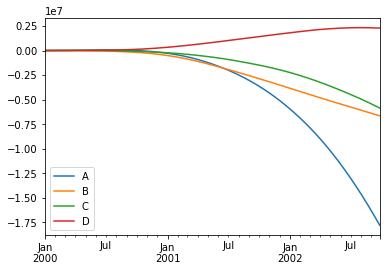

In [28]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend()
#plt.legend(loc='best')

Getting data in/out

CSV

In [30]:
df = pd.read_csv('data.csv')

print(df.head(10))

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.0
6        60    110       136     374.0
7        45    104       134     253.3
8        30    109       133     195.1
9        60     98       124     269.0
